## REFACTORS

    avg_func : callable, optional, default: np.mean
        The function to calculate the average for a particular parameter value.
    var_func : callable, optional, default: np.std
        The function to calculate the variability for a particular parameter value.

## PARTIAL CORRELATIONS

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from itertools import combinations
from sklearn import linear_model

In [4]:
#data
iris_data = load_iris()
iris_data = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])

In [5]:
#get all the pairs of variables
xy_combinations = list(combinations(iris_data.columns, 2))
z = [[col for col in iris_data.columns if col not in xy] for xy in xy_combinations]
xyz_combinations = list(zip(xy_combinations, z))

In [6]:
iris_data['sepal length (cm)'].values

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [7]:
# # Reshaping data for square matrix form
# part_corr_df = pd.DataFrame(pd.concat(list(map(part_corr, xyz_combinations))), columns=['part_corr']).reset_index()
# part_corr_matrix = part_corr_df.pivot_table(values='part_corr', index='level_0', columns='level_1')
# part_corr_matrix


### Check Partial Correlations with pingouin

In [ ]:
import pandas as pd
from pingouin import partial_corr, pcorr
from scipy.stats import spearmanr

In [ ]:
df = pd.DataFrame(results)
df['age'] = ages

In [ ]:
for meas in ts_measures:
    print(meas)
    print(partial_corr(df, meas, 'age', x_covar='specparam', method='spearman'))
    print(partial_corr(df, meas, 'age', covar='specparam', method='spearman'))
    print('\n')

### Check partial correlations with seaborn

In [ ]:
df = pd.DataFrame(results)
df['age'] = ages

In [ ]:
axi = sns.regplot(data=df, x='age', y='perm_entropy', fit_reg=False, y_partial='specparam')
vals = axi.collections[0].get_offsets()
a1 = np.array(vals[:, 0])
a2 = np.array(vals[:, 1])
print(spearmanr(a1, a2))

## SHORT LABELS

In [1]:
# TODO - check and update labels from apm
LABELS = {
    'autocorr_decay_time' : 'AC Decay',
    'dfa' : 'DFA',
    'higuchi_fd' : 'Higuchi FD',
    'hjorth_complexity' : 'Hjorth',
    'lempelziv' : 'LZC',
    'sample_entropy' : 'SampEnt',
    'perm_entropy' : 'PermEnt',
}

## FUZZY ENTROPY

In [ ]:
from neurokit2.complexity import entropy_fuzzy

In [ ]:
FZ_ENT_PARAMS = {
    'delay' : 1,
    'dimension' : 2,
    'tolerance' : 0.04,
}

In [ ]:
def fuzzy_entropy(sig, **kwargs):
    """   """

    return entropy_fuzzy(sig, **kwargs)[0]

In [ ]:
print('Computed fuzzy entropy:')
print('  powerlaw: \t {:1.4f}'.format(fuzzy_entropy(SIG_AP, **FZ_ENT_PARAMS)))
print('  osc:      \t {:1.4f}'.format(fuzzy_entropy(SIG_OSC, **FZ_ENT_PARAMS)))
print('  combined: \t {:1.4f}'.format(fuzzy_entropy(SIG_COMB, **FZ_ENT_PARAMS)))
print('  knee:     \t {:1.4f}'.format(fuzzy_entropy(SIG_KN, **FZ_ENT_PARAMS)))

## MISC

In [274]:
from itertools import repeat

import numpy as np
from scipy.linalg import norm
import matplotlib.pyplot as plt

from neurodsp.sim.info import get_sim_func
from neurodsp.sim.utils import modulate_signal
from neurodsp.utils.decorators import normalize
from neurodsp.utils.data import create_times
from neurodsp.utils.sim import set_random_seed

In [275]:
fs = 500

height = 1
freq = 10
bw = 1

sig_ap = np.random.rand(30000)

In [276]:
%%timeit

set_random_seed(10)

sig_len = len(sig_ap)
times = create_times(sig_len / fs, fs)

# Compute the Fourier transform of the aperiodic signal
#   We extract the first half of the frequencies from the FFT, since the signal is real
sig_ap_hat = np.fft.fft(sig_ap)[0:(sig_len // 2 + 1)]

# Create the corresponding frequency vector, which is used to create the cosines to sum
freqs = np.linspace(0, fs / 2, num=sig_len // 2 + 1, endpoint=True)

sig_periodic = np.zeros(sig_len)
for f_val, fft in zip(freqs, sig_ap_hat):

    # Compute the sum of squares of the cosines
    cos_times = 2 * np.pi * f_val * times
    cos_norm = norm(np.cos(cos_times), 2) ** 2

    # Compute random phase shift
    pha = np.cos(cos_times + 2 * np.pi * np.random.rand())

    # Define relative height above the aperiodic power spectrum
    hgt = height * np.exp(-(f_val - freq) ** 2 / (2 * bw ** 2))

    sig_periodic += (-np.real(fft) + np.sqrt(np.real(fft) ** 2 + \
        (10 ** hgt - 1) * np.abs(fft) ** 2)) / cos_norm * pha

8.41 s ± 192 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [277]:
%%timeit

set_random_seed(10)

sig_len = len(sig_ap)
times = create_times(sig_len / fs, fs) * 2 * np.pi

# Compute the Fourier transform of the aperiodic signal, and precompute real & abs
#   We extract the first half of the frequencies from the FFT, since the signal is real
sig_ap_hat = np.fft.fft(sig_ap)[0:(sig_len // 2 + 1)]
fft_real = np.real(sig_ap_hat)
fft_abs = np.abs(sig_ap_hat) ** 2

# Create the corresponding frequency vector, which is used to create the cosines to sum
freqs = np.linspace(0, fs / 2, num=sig_len // 2 + 1, endpoint=True)

hgts = height * np.exp(-(freqs - freq) ** 2 / (2 * bw ** 2))
hgts = 10 ** hgts - 1

sig_periodic = np.zeros(sig_len)
for f_val, fft, fft_r, fft_a, hgt in zip(freqs, sig_ap_hat, fft_real, fft_abs, hgts):
#for f_val, fft, hgt in zip(freqs, sig_ap_hat, hgts):

    # Compute the sum of squares of the cosines, and random phase shift
    #cos_times = 2 * np.pi * times * f_val
    cos_times = times * f_val
    cos_norm = norm(np.cos(cos_times), 2) ** 2
    pha = np.cos(cos_times + 2 * np.pi * np.random.rand())

    #sig_periodic += (-fft_r + np.sqrt(fft_r ** 2 + (10 ** hgt - 1) * fft_a)) / cos_norm * pha
    sig_periodic += (-fft_r + np.sqrt(fft_r ** 2 + hgt * fft_a)) / cos_norm * pha
    #sig_periodic += (-np.real(fft) + np.sqrt(np.real(fft) ** 2 + hgt * np.abs(fft)**2)) / cos_norm * pha

8.53 s ± 300 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
sig_periodic[0:10]

array([ 0.26575579, -0.28514229, -0.3478612 , -0.17519636, -0.16400043,
       -0.20873803, -0.14648333, -0.41469664, -0.18927721,  0.35461226])

In [130]:
%%timeit
for f_val, fft in zip(freqs, sig_ap_hat):

    # Compute the sum of squares of the cosines
    cos_times = 2 * np.pi * f_val * times
    cos_norm = norm(np.cos(cos_times), 2) ** 2

    # Compute random phase shift
    pha = np.cos(cos_times + 2 * np.pi * np.random.rand())

861 ms ± 39.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [274]:
# #%%timeit
# # Create the combined signal by summing periodic & aperiodic
# sig = sig_ap + sig_periodic

In [275]:
# #%%timeit

# set_random_seed(10)

# sig_ap_hat_abs = np.abs(sig_ap_hat)**2
# sig_ap_hat_real = np.real(sig_ap_hat)

# pi2 = 2 * np.pi
# times_2pi = pi2 * times
# bw2 = 2 * bw ** 2

# sig_periodic = np.zeros(sig_len)
# for f_val, fft, fft_abs, fft_real in zip(freqs, sig_ap_hat, sig_ap_hat_abs, sig_ap_hat_real):

#     # Compute the sum of squares of the cosines
#     cos_times = f_val * times_2pi
#     cos_norm = norm(np.cos(cos_times), 2) ** 2

#     # Compute random phase shift
#     pha = np.cos(cos_times + 2 * np.pi * np.random.rand())

#     # Define relative height above the aperiodic power spectrum
#     hgt = height * np.exp(-(f_val - freq) ** 2 / bw2)

#     sig_periodic += (-fft_real + np.sqrt(fft_real ** 2 + (10 ** hgt - 1) * fft_abs)) / cos_norm * pha

In [278]:
%%timeit

set_random_seed(10)

sig_len = len(sig_ap)
times = create_times(sig_len / fs, fs)

# Compute the Fourier transform of the aperiodic signal
#   We extract the first half of the frequencies from the FFT, since the signal is real
sig_ap_hat = np.fft.fft(sig_ap)[0:(sig_len // 2 + 1)]

# Create the corresponding frequency vector, which is used to create the cosines to sum
freqs = np.linspace(0, fs / 2, num=sig_len // 2 + 1, endpoint=True)

times_2d = np.repeat(np.atleast_2d(times * 2 * np.pi), len(freqs), 0)
cos_times_2d = times_2d.T * freqs

cos_norm_2d = norm(np.cos(cos_times_2d), 2, axis=0) ** 2
# cos_norm_2d = np.ones_like(cos_times_2d)
# cos_norm_2d = np.cos(cos_times_2d, out=cos_norm_2d)
# cos_norm_2d = norm(cos_norm_2d, 2, axis=0) ** 2

pha_2d = np.cos(cos_times_2d + 2 * np.pi * np.random.rand(len(freqs)))
# pha_2d = np.ones_like(cos_times_2d)
# pha_2d = np.cos(cos_times_2d + 2 * np.pi * np.random.rand(len(freqs)), out=pha_2d)

hgts = height * np.exp(-(freqs - freq) ** 2 / (2 * bw ** 2))

sig_periodic_2d = (-np.real(sig_ap_hat) + np.sqrt(np.real(sig_ap_hat) ** 2 \
    + (10 ** hgts - 1) * np.abs(sig_ap_hat)**2)) / cos_norm_2d * pha_2d

sig_periodic = np.sum(sig_periodic_2d, 1)

52.9 s ± 3.38 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [279]:
%%timeit

set_random_seed(10)

sig_len = len(sig_ap)
times = create_times(sig_len / fs, fs)

# Compute the Fourier transform of the aperiodic signal
#   We extract the first half of the frequencies from the FFT, since the signal is real
sig_ap_hat = np.fft.fft(sig_ap)[0:(sig_len // 2 + 1)]

# Create the corresponding frequency vector, which is used to create the cosines to sum
freqs = np.linspace(0, fs / 2, num=sig_len // 2 + 1, endpoint=True)

#times_2d = np.repeat(np.atleast_2d(times * 2 * np.pi), len(freqs), 0)
#cos_times_2d = times_2d.T * freqs

cos_norm_2d = np.zeros(len(freqs))
pha_2d = np.zeros(shape=(sig_len, len(freqs)))
for ind, f_val in enumerate(freqs):

    # Compute the sum of squares of the cosines, and a random phase shift
    cos_times = 2 * np.pi * f_val * times
    cos_norm_2d[ind] = norm(np.cos(cos_times), 2) ** 2
    np.cos(cos_times + 2 * np.pi * np.random.rand(), out=pha_2d[:, ind])

hgts = height * np.exp(-(freqs - freq) ** 2 / (2 * bw ** 2))

sig_periodic_2d = (-np.real(sig_ap_hat) + np.sqrt(np.real(sig_ap_hat) ** 2 \
    + (10 ** hgts - 1) * np.abs(sig_ap_hat)**2)) / cos_norm_2d * pha_2d

sig_periodic = np.sum(sig_periodic_2d, 1)

21.8 s ± 278 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [178]:
%%timeit
for f_val in freqs:
    hgts = height * np.exp(-(f_val - freq) ** 2 / (2 * bw ** 2))

10.9 ms ± 94.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [177]:
%%timeit
hgts = height * np.exp(-(freqs - freq) ** 2 / (2 * bw ** 2))

30.7 µs ± 372 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [175]:
%%timeit
times_2d = np.repeat(np.atleast_2d(times * 2 * np.pi), len(freqs), 0)
cos_times_2d = times_2d.T * freqs

754 ms ± 8.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [174]:
%%timeit
cos_norm_2d = np.zeros(len(freqs))
pha_2d = np.zeros(shape=(sig_len, len(freqs)))
for ind, f_val in enumerate(freqs):

    # Compute the sum of squares of the cosines, and a random phase shift
    cos_times = 2 * np.pi * f_val * times
    cos_norm_2d[ind] = norm(np.cos(cos_times), 2) ** 2
    np.cos(cos_times + 2 * np.pi * np.random.rand(), out=pha_2d[:, ind])

2.7 s ± 55.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [169]:
%%timeit
sig_periodic_2d = (-np.real(sig_ap_hat) + np.sqrt(np.real(sig_ap_hat) ** 2 \
    + (10 ** hgts - 1) * np.abs(sig_ap_hat)**2)) / cos_norm_2d * pha_2d

392 ms ± 10.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [165]:
%%timeit
cos_norm_2d = norm(np.cos(cos_times_2d), 2, axis=0) ** 2
pha_2d = np.cos(cos_times_2d + 2 * np.pi * np.random.rand(len(freqs)))

3.33 s ± 39.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [163]:
%%timeit
pha_2d = np.zeros(shape=(sig_len, len(freqs)))
for ind, f_val in enumerate(freqs):

    # Compute the sum of squares of the cosines, and a random phase shift
    cos_times = 2 * np.pi * f_val * times
    cos_norm = norm(np.cos(cos_times), 2) ** 2
    np.cos(cos_times + 2 * np.pi * np.random.rand(), out=pha_2d[:, ind])

1.11 s ± 40.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [122]:
%%timeit
pha_2d = np.zeros(shape=(sig_len, len(freqs)))
for ind, f_val in enumerate(freqs):

    # Compute the sum of squares of the cosines, and a random phase shift
    cos_times = 2 * np.pi * f_val * times
    temp = np.zeros(sig_len)
    np.cos(cos_times, out=temp)
    cos_norm = norm(temp, 2) ** 2
    np.cos(cos_times + 2 * np.pi * np.random.rand(), out=pha_2d[:, ind])

1.1 s ± 22.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [99]:
%%timeit
norm(np.cos(cos_times), 2) ** 2

85.2 µs ± 2.4 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [102]:
#%%timeit
aa = np.cos(cos_times)

78.6 µs ± 1.39 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [103]:
%%timeit
norm(aa, 2) **2

9.2 µs ± 129 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [89]:
%%timeit
pha_2d = np.zeros(shape=(sig_len, len(freqs)))

2.49 µs ± 75.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [74]:
%%timeit
cos_norm_2d = norm(np.cos(cos_times_2d), 2, axis=0) ** 2
pha_2d = np.cos(cos_times_2d + 2 * np.pi * np.random.rand(len(freqs)))

1.49 s ± 20.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [63]:
#%%timeit
cos_norm_2d = norm(np.cos(cos_times_2d), 2, axis=0) ** 2
cos_norm_2d

array([10000.,  5000.,  5000., ...,  5000.,  5000., 10000.])

In [64]:
#%%timeit
cos_norm_2d = np.ones_like(cos_times_2d)
cos_norm_2d = np.cos(cos_times_2d, out=cos_norm_2d)
cos_norm_2d = norm(cos_norm_2d, 2, axis=0) ** 2

array([10000.,  5000.,  5000., ...,  5000.,  5000., 10000.])

In [71]:
cos_times_2d

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.28318531e-04, 1.25663706e-03, ...,
        3.14033602e+00, 3.14096434e+00, 3.14159265e+00],
       [0.00000000e+00, 1.25663706e-03, 2.51327412e-03, ...,
        6.28067203e+00, 6.28192867e+00, 6.28318531e+00],
       ...,
       [0.00000000e+00, 6.28130035e+00, 1.25626007e+01, ...,
        3.13939392e+04, 3.14002205e+04, 3.14065018e+04],
       [0.00000000e+00, 6.28192867e+00, 1.25638573e+01, ...,
        3.13970795e+04, 3.14033614e+04, 3.14096434e+04],
       [0.00000000e+00, 6.28255699e+00, 1.25651140e+01, ...,
        3.14002198e+04, 3.14065024e+04, 3.14127849e+04]])

In [47]:
%%timeit
times_2d = np.repeat(np.atleast_2d(times * 2 * np.pi), len(freqs), 0)
cos_times_2d = times_2d.T * freqs

312 ms ± 8.86 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [371]:
%%timeit
times_2d = np.repeat(np.atleast_2d(times * 2 * np.pi), len(freqs), 0)
cos_times_2d = times_2d * np.atleast_2d(freqs).T

745 µs ± 22.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [372]:
%%timeit
times_2d = np.ones([len(freqs), sig_len]) * (times * (2 * np.pi))
cos_times_2d =  times_2d * np.atleast_2d(freqs).T

1.26 ms ± 27 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [373]:
%%timeit
times_2d = np.ones([sig_len, len(freqs)]) * (np.atleast_2d(times).T * (2 * np.pi))
cos_times_2d =  times_2d * np.atleast_2d(freqs)

1.29 ms ± 21.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [255]:
%%timeit
times_2d = np.repeat(np.atleast_2d(times * pi2), len(freqs), 0)
cos_times_2d = times_2d.T * freqs
cos_norm_2d = norm(np.cos(cos_times_2d), 2, axis=0) ** 2
#pha_2d = np.cos(cos_times_2d + 2 * np.pi * np.random.rand(len(freqs)))


5.18 ms ± 81.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
# Note: in NDSP, update `get_sim_func` to accept a string input (single module)

## SIM KNEES

In [53]:
import numpy as np
from neurodsp.sim import sim_synaptic_kernel, sim_synaptic_current
from neurodsp.spectral import compute_spectrum
from neurodsp.plts.spectral import plot_power_spectra

In [54]:
from fooof import FOOOF
from fooof.utils.params import compute_knee_frequency

In [20]:
fs = 2000.
t_sim = 2.
t_ker = np.arange(0,t_sim,1/fs)
t_r = 0
t_ds = np.arange(0.005,0.08,0.01)
f_to_plot=200

In [21]:
t_ds

array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075])

In [ ]:
upd_exp = lambda params, val : params.update({'exponent' : val})

In [65]:
# Set knee ranges - defined based on the `tau_d` parameter of synaptic current function
KNEES = np.arange(0.005, 0.08, 0.01)


# Update knee, based on setting the decay time constant
upd_knee = lambda params, val : params.update({'tau_d' : val})

In [256]:
N_SECONDS = 30
FS = 500

In [257]:
sigs = []
for tau_d in KNEES:
    sig = sim_synaptic_current(N_SECONDS, FS, tau_d=tau_d)
    sigs.append(sig)

In [258]:
powers = []
for sig in sigs:
    freqs, pows = compute_spectrum(sig, FS)
    powers.append(pows)

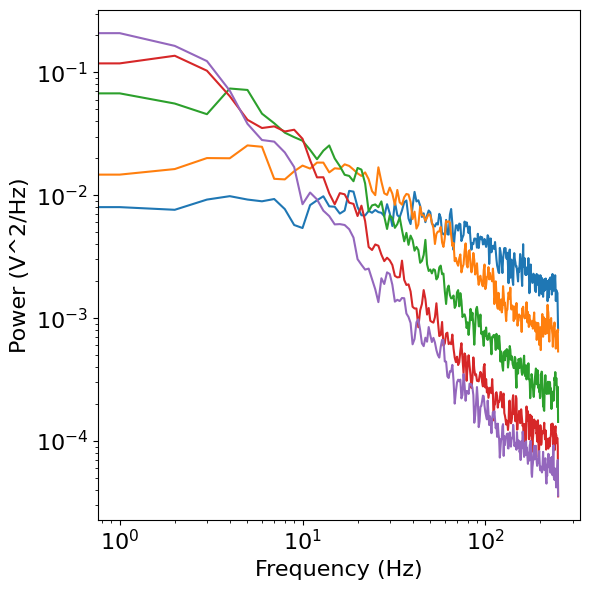

In [259]:
plot_power_spectra(freqs, powers)

In [260]:
fm = FOOOF(max_n_peaks=0, aperiodic_mode='knee', verbose=False)

In [261]:
knees = []
for pows in powers:
    fm.fit(freqs, pows)
    knees.append(fm.get_params('aperiodic', 'knee'))

In [262]:
knee_freqs = []
for knee in knees:
    knee_freqs.append(compute_knee_frequency(knee, 2))

In [263]:
knee_freqs

[28.59710565537666,
 10.618645691661234,
 4.402890328656487,
 1.9976192032353552,
 0.8808161557490015]

In [264]:
KNEES

array([0.002, 0.005, 0.015, 0.04 , 0.07 ])

In [155]:


# kernels = []
# # get synaptic kernels
# for t_d in t_ds:
#     ker = sim.sim_synaptic_kernel(t_sim, fs, tau_r=t_r, tau_d=t_d)
#     kernels.append(ker/ker[0])

In [ ]:
alphas = []
fm = FOOOF(verbose=False)
for ind, sig in enumerate(all_data):
    freqs, powers = compute_spectrum(sig, fs=fs, f_range=f_range)
    fm.fit(freqs, powers)
    alphas.append(np.max(fm.get_params('peak', 'PW')))

## EXTRA FUNCTIONS

In [1]:
def save_figure(save_fig, file_name, file_path):
    """Save out a figure."""

    if save_fig:
        plt.tight_layout()
        file_name = file_name + SAVE_EXT

        if not os.path.isdir(os.path.join(APMDB().figs_path, file_path)):
            os.mkdir(os.path.join(APMDB().figs_path, file_path))

        plt.savefig(os.path.join(APMDB().figs_path, file_path, file_name))

In [2]:
def custom_psd_style(ax, **kwargs):
    """Define custom styling for the PSD plots."""

    ax.set_xticks([], minor=True)
    ax.set_yticks([], minor=True)

    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])

    plt.tight_layout()

In [1]:
def sampler(values, probs=None):
    """Create a generator to sample from a parameter range."""
        
    # Check that length of options is same as length of probs, if provided
    if np.any(probs):
        if len(inds) != len(probs):
            raise ValueError("The number of options must match the number of probabilities.")
    
    while True:
        yield np.random.choice(values, p=probs)
        

def stepper(start, stop, step):
    """Create a generator to step across a parameter range.
    
    Parameters
    ----------
    start
    
    
    """
    
    for val in np.arange(start, stop, step):
        yield(val)

        
# def sample_vals(sim_params, sampler, update):
#     """   """
#     while True:
#         val = next(sampler)
#         update(sim_params, val)
#         yield sim_params